In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import numpy
from keras.callbacks import Callback
from sklearn.feature_selection import mutual_info_classif
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
mon=[]


In [52]:
class Scheduler(Callback):
    def on_train_begin(self, logs={}):
        print("Training begin")
    #def on_batch_end(self, batch, logs={}):   
    def on_epoch_end(self, epoch, logs={}):
        first_output=K.function([self.model.layers[0].input],[self.model.layers[2].output])
        layer_output=first_output([X])[0]
        mut=mutual_info_classif(layer_output,Y)
        mon.append(sum(mut))

Training begin
Epoch 1/100
768/768 [==============================] - 4s 5ms/step - loss: 0.9401 - acc: 0.6471
Epoch 2/100
768/768 [==============================] - 0s 23us/step - loss: 0.7668 - acc: 0.6380
Epoch 3/100
768/768 [==============================] - 0s 23us/step - loss: 0.7010 - acc: 0.5990
Epoch 4/100
768/768 [==============================] - 0s 20us/step - loss: 0.6676 - acc: 0.6016
Epoch 5/100
768/768 [==============================] - 0s 21us/step - loss: 0.6347 - acc: 0.6523
Epoch 6/100
768/768 [==============================] - 0s 20us/step - loss: 0.6185 - acc: 0.6849
Epoch 7/100
768/768 [==============================] - 0s 24us/step - loss: 0.6127 - acc: 0.6901
Epoch 8/100
768/768 [==============================] - 0s 23us/step - loss: 0.6075 - acc: 0.6927
Epoch 9/100
768/768 [==============================] - 0s 22us/step - loss: 0.6000 - acc: 0.6979
Epoch 10/100
768/768 [==============================] - 0s 24us/step - loss: 0.5936 - acc: 0.7057
Epoch 11/100
76

ValueError: x and y must have same first dimension, but have shapes (100,) and (178,)

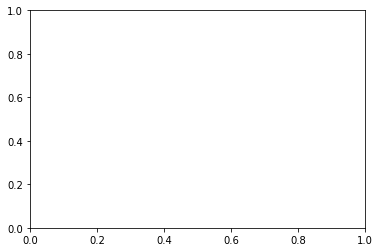

In [54]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
outt=Scheduler()
model.fit(X, Y, epochs=50, batch_size=256,callbacks=[outt],verbose=1)
epo=[]
for i in range(100):
    epo.append(i)
import matplotlib.pyplot as plt
plt.plot(epo,mon)
plt.show()
